## Import modules

### Import files

In [1]:
from server import *
from prompt_template.prompt_rephrase import *
from global_functions import *

### Import games

In [2]:
from games.guessing_game import *
from games.bar_game import *
from games.pirate_game import *
from games.diner_dilemma import *
from games.divide_dollar import *
from games.sealed_bid_auction import *
from games.public_goods import *
from games.battle_royale import *

### Import board

In [3]:
from board import *
board = Leaderboard()
board.show()

,Overall,Guessing,Bar,Dollar,Goods,Diner,Auction,Battle,Pirate
👑**Gemini-1.5-Pro**,69.8,95.4,37.2,93.8,100.0,35.9,26.9,81.3,87.9
GPT-4o-0806,66.7,94.3,70.0,95.2,90.9,10.7,20.8,67.3,84.4
LLaMA-3.1-70B,65.9,84.0,59.7,87.0,90.6,48.1,15.7,77.7,64.0
GPT-4t-0125,62.4,91.6,23.0,98.1,89.2,0.9,24.2,86.8,85.4
Mixtral-8x22B,62.4,83.6,39.3,79.0,83.7,79.9,13.2,36.0,84.3
LLaMA-3.1-405B,61.8,94.3,20.5,94.9,97.0,14.4,14.7,92.7,65.6
Qwen-2-72B,56.7,93.2,17.0,91.9,81.3,0.0,2.5,81.7,86.1
LLaMA-3.1-8B,56.0,85.5,75.7,56.4,19.6,59.3,37.1,35.9,78.3
Gemini-1.0-Pro,45.7,77.3,33.5,77.6,68.5,3.1,31.6,16.5,57.4
GPT-3.5-1106,45.1,68.5,64.3,70.3,43.5,1.4,7.6,35.7,69.5


## Operations

### Rephrase prompt templates

In [ ]:
game_file = 'bar_game'
rephrase_files = ['description', 'report_explicit', 'report_implicit', 'request']
rephrase([f"prompt_template/{game_file}/{f}_v1.txt" for f in rephrase_files], replace_suffix="v1", suffix="v2")

## Game Run

### Model Configuration

In [ ]:
# Set all players to be gpt-3.5-turbo
models = 'meta-llama/Meta-Llama-3.1-70B-Instruct'    

# Players in odd position are gpt-3.5-turbo, even position are gpt-4
player_num = 10
# models = ['gpt-3.5-turbo' if i%2==0 else 'gpt-4' for i in range(player_num)]

### Game Run (Guessing Game)

In [ ]:
# Initialize guessing game with parameters
for i in range(2,6):
    game = GuessingGame(player_num=10, min=0, max=100, ratio=2/3, ratio_str='2/3', version='v1', models=models, name_exp=f"guessing_game_{i}")
    # Run for 20 rounds
    game.run(20)

### Game Load (Guessing Game)

In [ ]:
game = load('save/guessing_game.json', GuessingGame)  # load the saved data 
game = load('save/guessing_game.json', GuessingGame, 'guessing_game2')  # load and save as new file

# Run for 20 more rounds
game.run(20)

### Game Show

In [ ]:
# Show the analysis results with specifying players
game.show('model', ['gpt-3.5-turbo'])
game.show('id', [f"player_{i}" for i in range(player_num) if i%2==0])

## Analysis 
- Available for all games, but some games may need some special handling, i.e. `Pirate Game` and `Sealed Bid Auction`

### Import files

In [4]:
from server import *
from global_functions import *
from analysis.analysis import *

### Import games

In [5]:
from games.guessing_game import *
from games.bar_game import *
from games.diner_dilemma import *
from games.divide_dollar import *
from games.battle_royale import *
from games.pirate_game import *
from games.public_goods import *
from games.sealed_bid_auction import *

In [3]:
# Load the files with the same label
files = [f'raw_results/public_goods/public_goods_v1_{i}.json' for i in range(1,2)]
for file in files:
    game = load(file, PublicGoods)
    game.graphical_analysis(game.players)


### Plot

/Users/ericjohnli/Downloads/Jan25/GAMABench/analysis/analysis.py:115: RuntimeWarning: Mean of empty slice
  L1_list = np.nanmean([t[0] for t in analysis], axis=0)  # Extract L1_list from tuples
/Users/ericjohnli/Downloads/Jan25/GAMABench/analysis/analysis.py:117: RuntimeWarning: Mean of empty slice
  accuracy_list = np.nanmean(accuracy_list, axis=0)


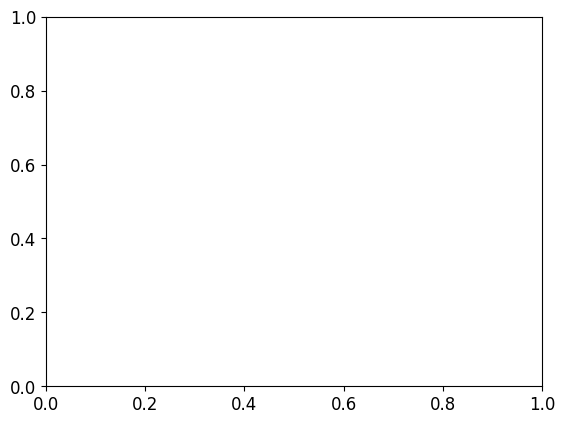

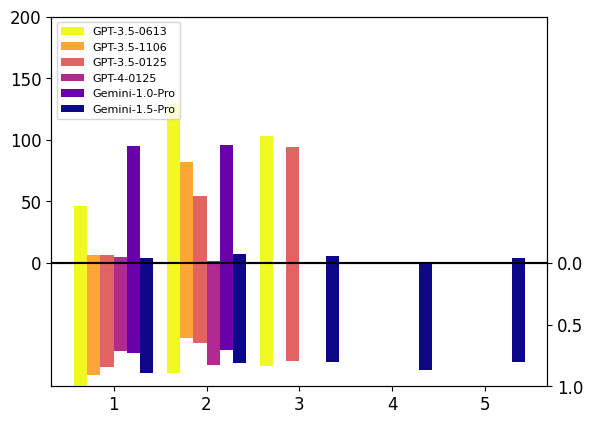

In [6]:
# Create a game plane
plane = Analysis(PirateGame)

# Load the files with the same label
files = [f'raw_results/pirate_game/gpt-3.5-turbo-0613_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/pirate_game/gpt-3.5-turbo-1106_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/pirate_game/pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/pirate_game/gpt-4-0125-preview_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/pirate_game/gemini-1.0-pro_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/pirate_game/gemini-1.5-pro_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", loc='best', savename="closed-source_pirate_game")

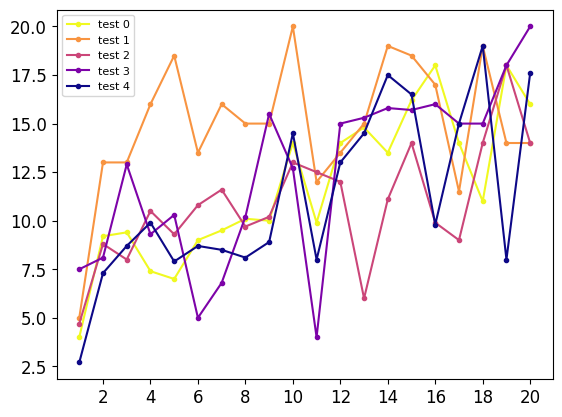

In [7]:
# Create a game plane
plane = Analysis(PublicGoods)

# Load the files with the same label
files = [f'raw_results/public_goods/public_goods_v1_{i}.json' for i in range(1,6)]
for i, file in enumerate(files):
    plane.add(file, f"test {i}")

# Plot the game
plane.plot(xlabel="", loc='best', savename="closed-source_public_goods_runs")

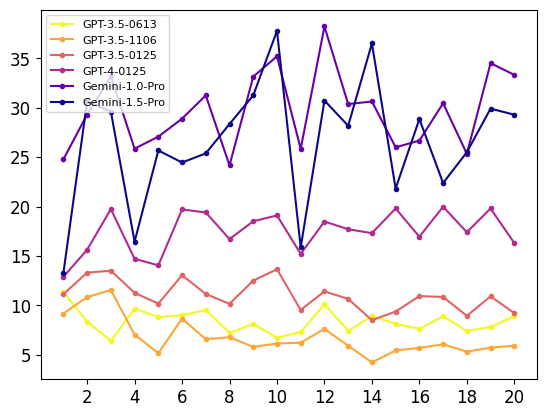

In [8]:
# Create a game plane
plane = Analysis(SealedBidAuction)

# Load the files with the same label
files = [f'raw_results/sealed_bid_auction/first_price/gpt-3.5-turbo-0613_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/sealed_bid_auction/first_price/gpt-3.5-turbo-1106_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/sealed_bid_auction/first_price/sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/sealed_bid_auction/first_price/gpt-4-0125-preview_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/sealed_bid_auction/first_price/gemini-1.0-pro_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/sealed_bid_auction/first_price/gemini-1.5-pro_sealed_bid_auction_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", loc='best', savename="closed-source_sealed_bid_auction_first_price")

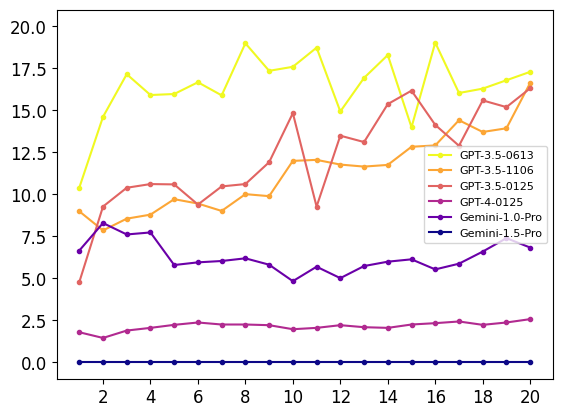

In [9]:
# Create a game plane
plane = Analysis(PublicGoods)

# Load the files with the same label
files = [f'raw_results/public_goods/gpt-3.5-turbo-0613_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/public_goods/gpt-3.5-turbo-1106_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/public_goods/public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/public_goods/gpt-4-0125-preview_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/public_goods/gemini-1.0-pro_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/public_goods/gemini-1.5-pro_public_goods_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-1, 21), loc='best', savename="closed-source_public_goods")

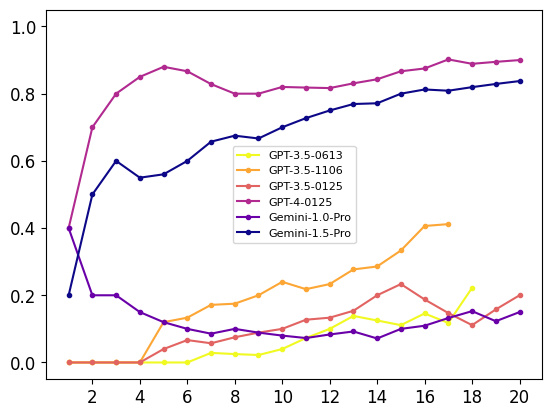

In [10]:
# Create a game plane
plane = Analysis(BattleRoyale)

# Load the files with the same label
files = [f'raw_results/battle_royale/gpt-3.5-turbo-0613_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/battle_royale/gpt-3.5-turbo-1106_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/battle_royale/battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/battle_royale/gpt-4-0125-preview_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/battle_royale/gemini-1.0-pro_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/battle_royale/gemini-1.5-pro_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-0.05, 1.05), loc='best', savename="closed-source_battle_royale")

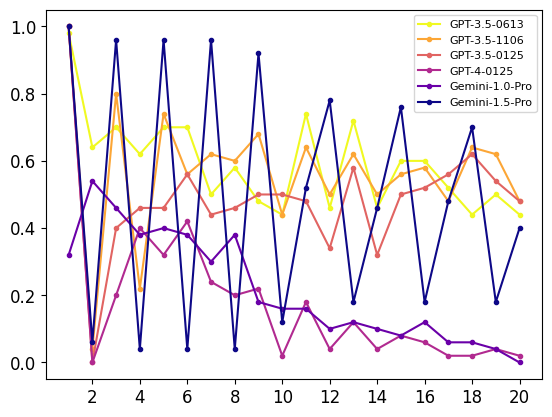

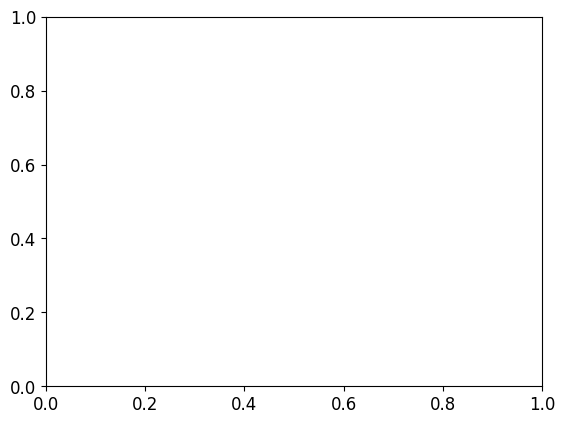

In [11]:
# Create a game plane
plane = Analysis(BarGame)

# Load the files with the same label
files = [f'raw_results/bar_game_implicit/gpt-3.5-turbo-0613_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/bar_game_implicit/gpt-3.5-turbo-1106_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/bar_game_implicit/bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/bar_game_implicit/gpt-4-0125-preview_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/bar_game_implicit/gemini-1.0-pro_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/bar_game_implicit/gemini-1.5-pro_bar_game_implicit_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-0.05, 1.05), savename="closed-source_bar_game_implicit")

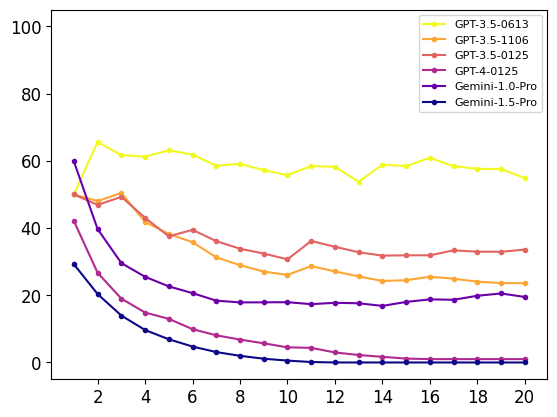

In [12]:
# Create a game plane
plane = Analysis(GuessingGame)

# Load the files with the same label
files = [f'raw_results/guessing_game/gpt-3.5-turbo-0613_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/guessing_game/gpt-3.5-turbo-1106_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/guessing_game/guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/guessing_game/gpt-4-0125-preview_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/guessing_game/gemini-1.0-pro_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/guessing_game/gemini-1.5-pro_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-5, 105), savename="closed-source_guessing_game")

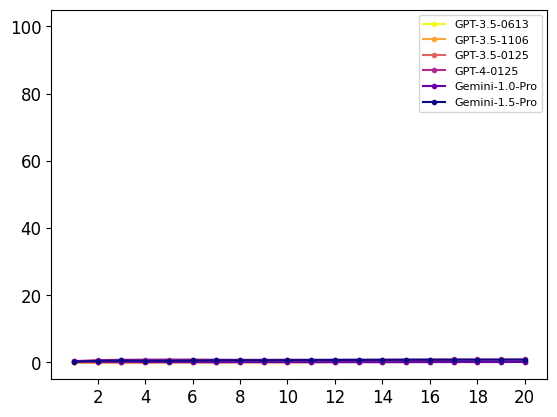

In [13]:
# Create a game plane
plane = Analysis(BattleRoyale)

# Load the files with the same label
files = [f'raw_results/battle_royale/gpt-3.5-turbo-0613_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/battle_royale/gpt-3.5-turbo-1106_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/battle_royale/battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/battle_royale/gpt-4-0125-preview_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/battle_royale/gemini-1.0-pro_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/battle_royale/gemini-1.5-pro_battle_royale_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-5, 105), savename="closed-source_battle_royale")

/Users/ericjohnli/Downloads/Jan25/GAMABench/analysis/analysis.py:115: RuntimeWarning: Mean of empty slice
  L1_list = np.nanmean([t[0] for t in analysis], axis=0)  # Extract L1_list from tuples
/Users/ericjohnli/Downloads/Jan25/GAMABench/analysis/analysis.py:117: RuntimeWarning: Mean of empty slice
  accuracy_list = np.nanmean(accuracy_list, axis=0)


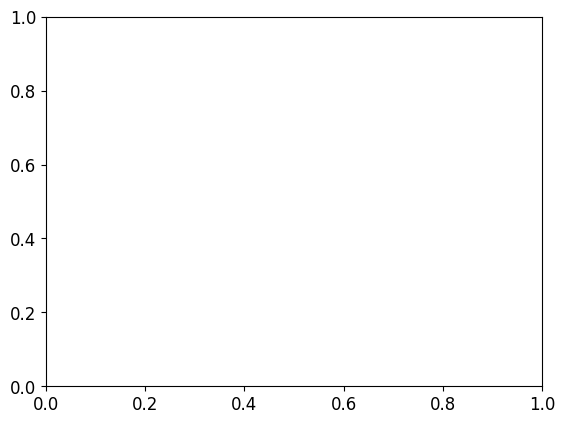

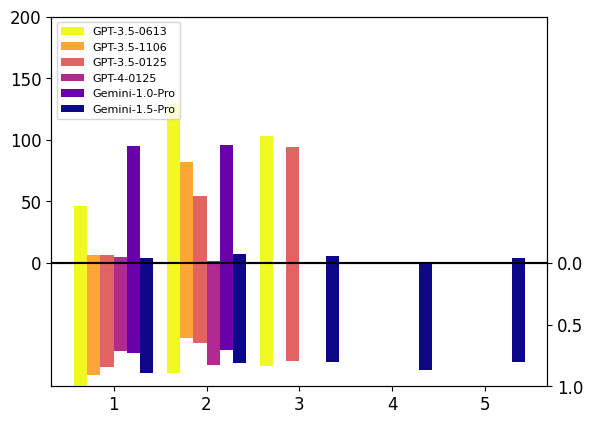

In [14]:
# Create a game plane
plane = Analysis(PirateGame)

# Load the files with the same label
files = [f'raw_results/pirate_game/gpt-3.5-turbo-0613_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/pirate_game/gpt-3.5-turbo-1106_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/pirate_game/pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/pirate_game/gpt-4-0125-preview_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/pirate_game/gemini-1.0-pro_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/pirate_game/gemini-1.5-pro_pirate_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-5, 105), savename="closed-source_pirate_game")